 # Portfolio Analysis
 ---

In [175]:
#The following is a script to do the following:
# 1.
# 2.
# 3. 


In [207]:
#Initial imports of libraries and functions
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
from pathlib import Path

%matplotlib inline

# Data Cleaning

## Whale Investor Daily Returns

In [177]:
#Read in the whale returns to a new dataframe with the date as the index, and then sort the index in ascending order
whale_path = Path("Resources/whale_returns.csv")
whale_df = pd.read_csv(whale_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
whale_df.sort_index(inplace=True)

In [178]:
#Display information about the whale returns dataframe to get an idea of what is inside (data types, etc.) and then count the number of null values
whale_df.info()
whale_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1060 entries, 2015-03-02 to 2019-05-01
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SOROS FUND MANAGEMENT LLC    1059 non-null   float64
 1   PAULSON & CO.INC.            1059 non-null   float64
 2   TIGER GLOBAL MANAGEMENT LLC  1059 non-null   float64
 3   BERKSHIRE HATHAWAY INC       1059 non-null   float64
dtypes: float64(4)
memory usage: 41.4 KB


SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [179]:
#Drop the null values in the whale returns dataframe and save over the original dataframe
whale_df = whale_df.dropna()

## Algorithmic Daily Returns

In [180]:
#Read in the algorithm returns to a new dataframe with the date as the index, and then sort the index in ascending order
algo_path = Path("Resources/algo_returns.csv")
algo_df = pd.read_csv(algo_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_df.sort_index(inplace=True)

In [181]:
#Display information about the algorithm returns dataframe to get an idea of what is inside (data types, etc.) and then count the number of null values
algo_df.info()
algo_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1241 entries, 2014-05-28 to 2019-05-01
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Algo 1  1241 non-null   float64
 1   Algo 2  1235 non-null   float64
dtypes: float64(2)
memory usage: 29.1 KB


Algo 1    0
Algo 2    6
dtype: int64

In [182]:
#Drop the null values in the algorithm returns dataframe and save over the original dataframe
algo_df = algo_df.dropna()

## S&P 500 Daily Returns

In [183]:
#Read in the S&P 500 closing prices to a new dataframe with the date as the index, and then sort the index in ascending order
sp500_prices_path = Path("Resources/sp500_history.csv")
sp500_prices_df = pd.read_csv(sp500_prices_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp500_prices_df.sort_index(inplace=True)

In [184]:
#Display information about the S&P 500 dataframe to get an idea of what is inside (including data types)
sp500_prices_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1649 entries, 2012-10-01 to 2019-04-23
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Close   1649 non-null   object
dtypes: object(1)
memory usage: 25.8+ KB


In [185]:
#Remove the dollar signs from the closing prices column (warning message is for future Pandas update, but the code still executes as required here)
sp500_prices_df["Close"] = sp500_prices_df["Close"].str.replace("$","")

C:\Users\bradl\AppData\Local\Temp/ipykernel_4688/3613562770.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp500_prices_df["Close"] = sp500_prices_df["Close"].str.replace("$","")


In [186]:
#Convert the data type for the closing prices to float
sp500_prices_df["Close"] = sp500_prices_df["Close"].astype(float)

In [187]:
#Calculate the S&P 500 daily returns and save in a new dataframe
sp500_returns_df = sp500_prices_df.pct_change()

In [188]:
#Drop the null values in the S&P 500 returns dataframe and save over the dataframe
sp500_returns_df = sp500_returns_df.dropna()

In [189]:
# Rename the "Close" column since it is now the calculated daily return
sp500_returns_df = sp500_returns_df.rename(columns={"Close":"S&P 500"})

## Combine Whale, Algorithmic, and S&P 500 Returns

In [190]:
#Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single dataframe with columns for each portfolio's returns.
combined_returns = pd.concat([whale_df, algo_df, sp500_returns_df], axis="columns", join="inner")

---

# Conduct Quantitative Analysis

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Daily Portfolio Returns'}, xlabel='Date', ylabel='Daily Return'>

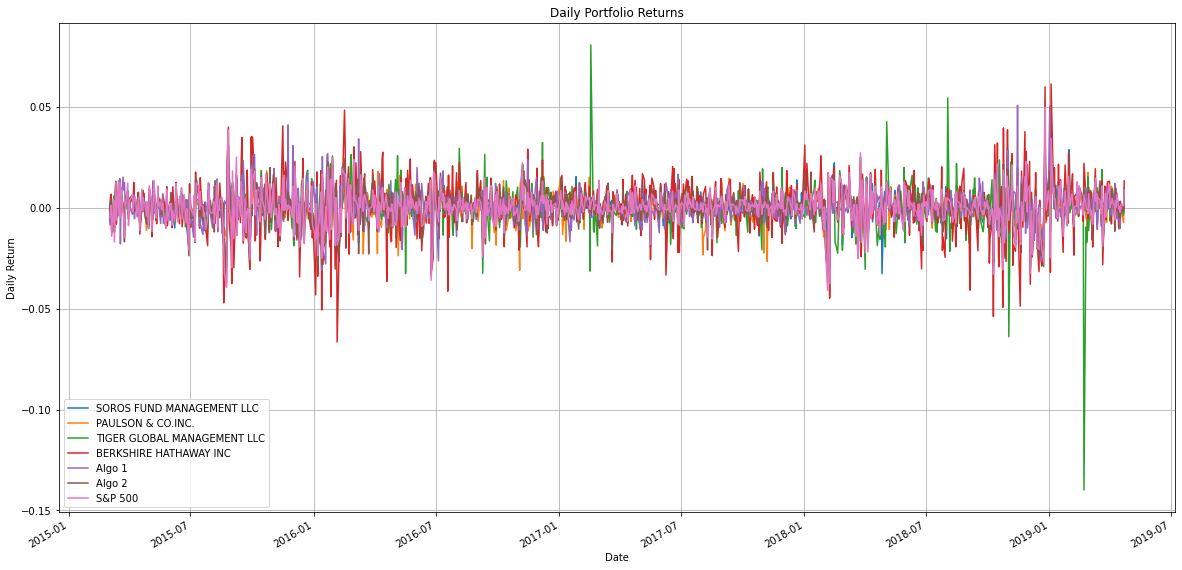

In [191]:
#Plot the daily returns for each portfolio on a combined plot
combined_returns.plot(title = "Daily Portfolio Returns", figsize = (20,10), ylabel="Daily Return", grid=True)

#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Cumulative Portfolio Returns'}, xlabel='Date', ylabel='Cumulative Return'>

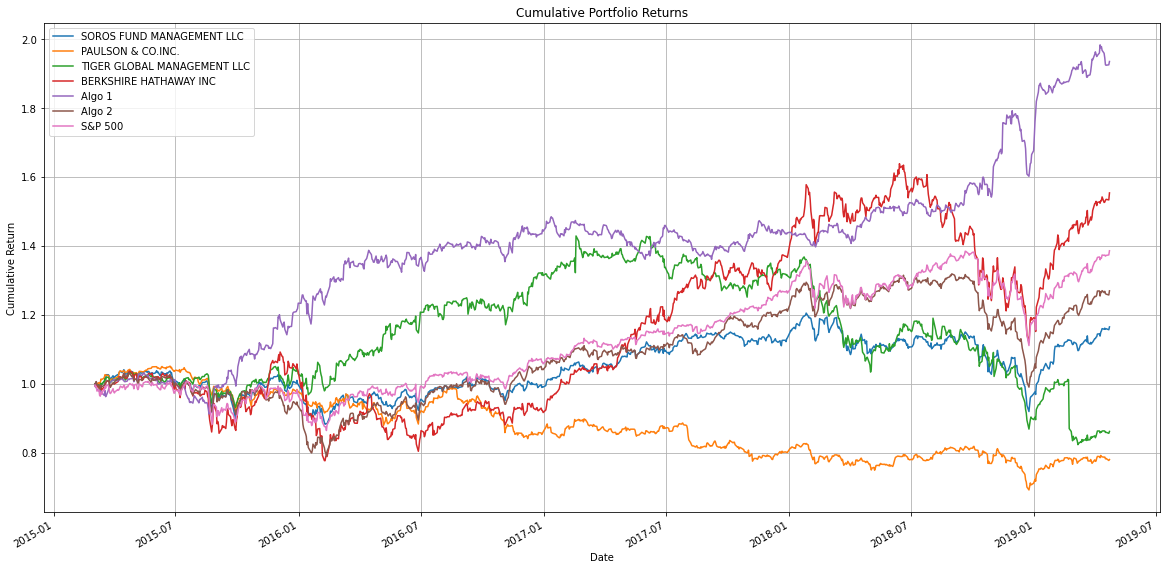

In [192]:
#Calculate the cumulative returns of each portfolio
combined_cumulative_returns = (1 + combined_returns).cumprod()

#Plot the cumulative returns for each portfolio on a combined plot
combined_cumulative_returns.plot(title = "Cumulative Portfolio Returns", figsize = (20,10), ylabel="Cumulative Return", grid=True)

---

## Risk Analysis

### Create a box plot for each portfolio


<AxesSubplot:title={'center':'Daily Portfolio Returns'}, ylabel='Daily Return'>

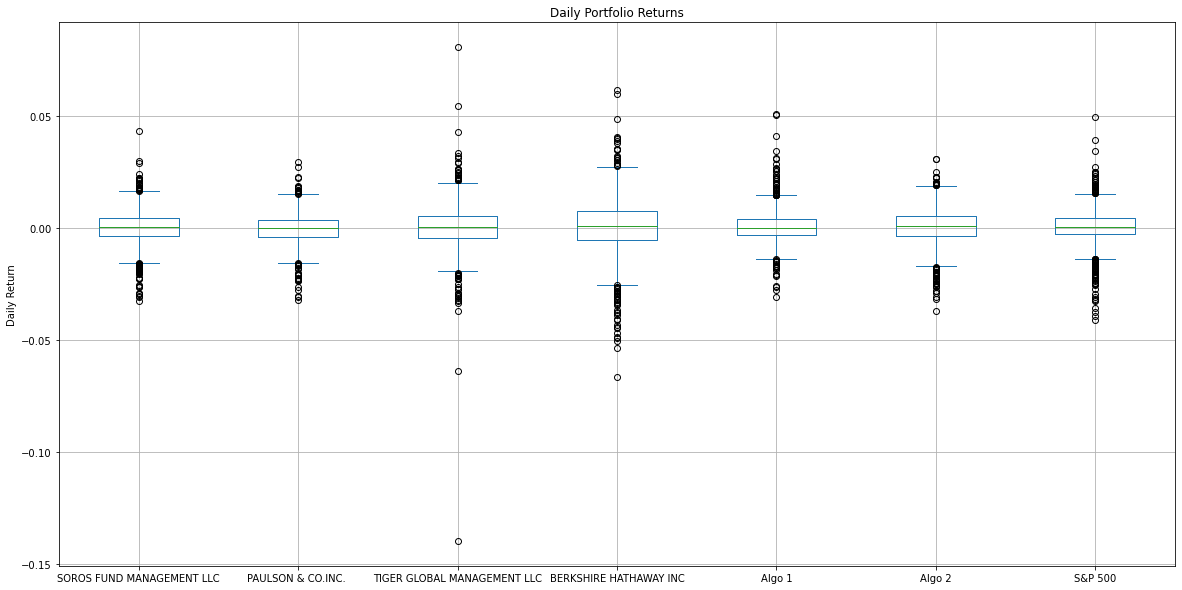

In [193]:
#Create a box plot for each portfolio to visually show risk
combined_returns.plot.box(title = "Daily Portfolio Returns", figsize = (20,10), ylabel="Daily Return", grid=True)

### Calculate standard deviations of the portfolios

In [194]:
#Calculate the daily standard deviation for all portfolios and the S&P 500
soros_daily_std = combined_returns["SOROS FUND MANAGEMENT LLC"].std()
paulson_daily_std = combined_returns["PAULSON & CO.INC. "].std()
tiger_daily_std = combined_returns["TIGER GLOBAL MANAGEMENT LLC"].std()
berkshire_daily_std = combined_returns["BERKSHIRE HATHAWAY INC"].std()
algo1_daily_std = combined_returns["Algo 1"].std()
algo2_daily_std = combined_returns["Algo 2"].std()

combined_returns_std = {
    "SOROS FUND MANAGEMENT LLC" : soros_daily_std,
    "PAULSON & CO.INC." : paulson_daily_std,
    "TIGER GLOBAL MANAGEMENT LLC" : tiger_daily_std,
    "BERKSHIRE HATHAWAY INC" : berkshire_daily_std,
    "Algo 1" : algo1_daily_std,
    "Algo 1" : algo2_daily_std
}

### Determine which portfolios are riskier than the S&P 500

In [195]:
#Calculate the daily standard deviation of the S&P 500
sp500_daily_std = combined_returns["S&P 500"].std()

In [199]:
#Determine which portfolios are riskier than the S&P 500 (i.e. standard deviation of portfolio > standard deviation of S&P 500)
for returns in combined_returns_std:
    if sp500_daily_std < combined_returns_std[returns]:
        print(f"{returns} is riskier than the S&P 500")

TIGER GLOBAL MANAGEMENT LLC is riskier than the S&P 500
BERKSHIRE HATHAWAY INC is riskier than the S&P 500


###  Calculate the Annualized Standard Deviation

In [109]:
#Calculate the annualized standard deviation (252 trading days) for all portfolios and the S&P 500
combined_returns_annual_std = combined_returns.std() * np.sqrt(252)
combined_returns_annual_std

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P 500                        0.135786
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'Rolling 21-Day Standard Deviation of Portfolio Returns'}, xlabel='Date', ylabel='Rolling 21-Day Standard Deviation'>

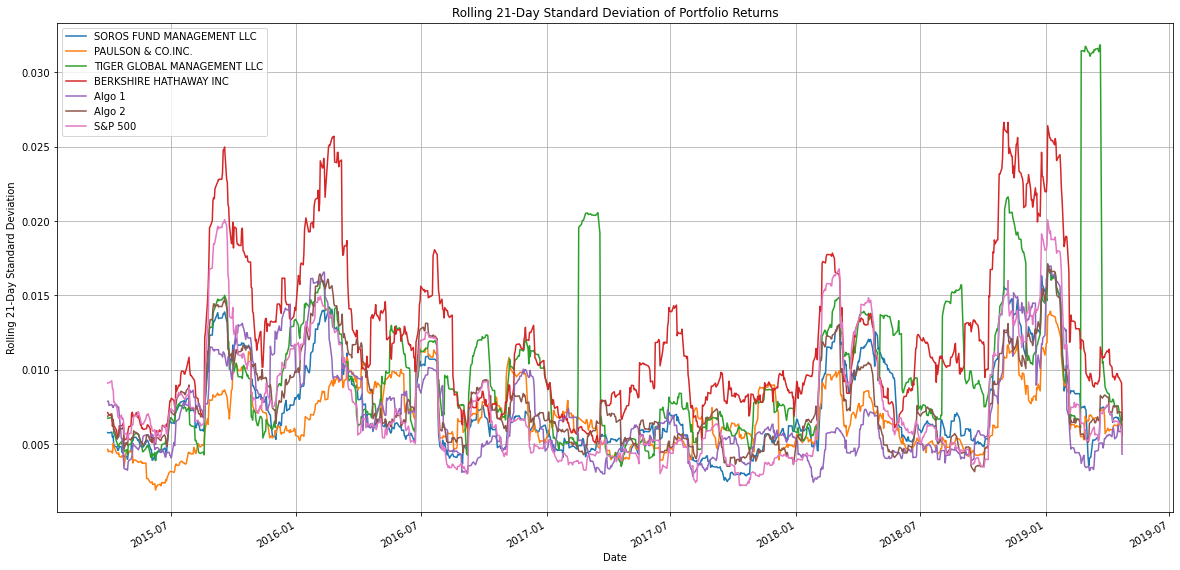

In [202]:
#Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
combined_returns.rolling(window=21).std().plot(title = "Rolling 21-Day Standard Deviation of Portfolio Returns", figsize = (20,10), ylabel="Rolling 21-Day Standard Deviation", grid=True)

### Calculate and plot the correlation

<AxesSubplot:>

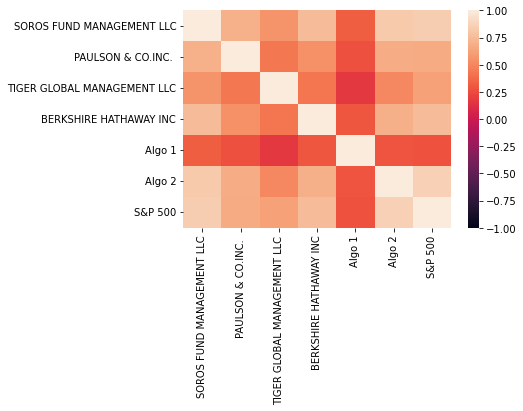

In [209]:
# Calculate the correlation between the portfolios and S&P 500
portfolios_correlation = combined_returns.corr()

#Display the correlations in a correlations matrix (i.e., heat map)
sns.heatmap(portfolios_correlation, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [ ]:
# Calculate covariance of a single portfolio

# Calculate variance of S&P 500

# Computing beta

# Plot beta trend


## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [ ]:
# Use `ewm` to calculate the rolling window


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Annualized Sharpe Ratios


In [ ]:
# Visualize the sharpe ratios as a bar plot


### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [ ]:
# Reading data from 1st stock


In [ ]:
# Reading data from 2nd stock


In [ ]:
# Reading data from 3rd stock


In [ ]:
# Combine all stocks in a single DataFrame


In [ ]:
# Reset Date index


In [ ]:
# Reorganize portfolio data by having a column per symbol


In [ ]:
# Calculate daily returns

# Drop NAs

# Display sample data


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [ ]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return

# Display sample data


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [ ]:
# Join your returns DataFrame to the original returns DataFrame


In [ ]:
# Only compare dates where return data exists for all the stocks (drop NaNs)


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [ ]:
# Calculate the annualized `std`


### Calculate and plot rolling `std` with 21-day window

In [ ]:
# Calculate rolling standard deviation

# Plot rolling standard deviation


### Calculate and plot the correlation

In [ ]:
# Calculate and plot the correlation


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [ ]:
# Calculate and plot Beta


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Calculate Annualzied Sharpe Ratios


In [ ]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!